In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    "Machine_ID": np.arange(1, 101),
    "Temperature": np.random.uniform(50, 100, 100),
    "Run_Time": np.random.uniform(1, 500, 100),
    "Downtime_Flag": np.random.choice([0, 1], size=100, p=[0.8, 0.2]),
}
df = pd.DataFrame(data)
df.to_csv("manufacturing_data.csv", index=False)


In [ ]:
df.head()

,Machine_ID,Temperature,Run_Time,Downtime_Flag
0,1,68.727006,16.683164,0
1,2,97.535715,318.568795,0
2,3,86.599697,157.863635,0
3,4,79.932924,254.776775,1
4,5,57.800932,453.875670,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.isnull().sum()

,0
Machine_ID,0
Temperature,0
Run_Time,0
Downtime_Flag,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Machine_ID     100 non-null    int64  
 1   Temperature    100 non-null    float64
 2   Run_Time       100 non-null    float64
 3   Downtime_Flag  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Run_Time'>

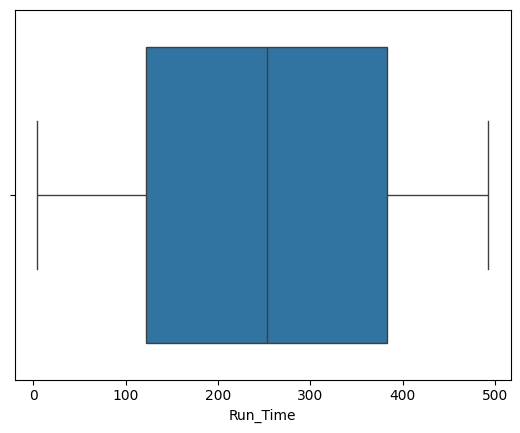

In [ ]:
sns.boxplot(x='Run_Time',data = df)

In [ ]:
df.describe()

,Machine_ID,Temperature,Run_Time,Downtime_Flag
count,100.000000,100.000000,100.000000,100.00000
mean,50.500000,73.509037,249.418030,0.21000
std,29.011492,14.874471,146.262515,0.40936
min,1.000000,50.276106,4.469113,0.00000
25%,25.750000,59.660038,121.760259,0.00000
50%,50.500000,73.207123,253.306804,0.00000
75%,75.250000,86.510156,383.325615,0.00000
max,100.000000,99.344347,492.839577,1.00000


In [ ]:
X = df[["Temperature", "Run_Time"]]
y = df["Downtime_Flag"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
y_pred_lr = log_reg.predict(X_test)


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [ ]:
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.80
F1 Score: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred_dt = dt_clf.predict(X_test)


In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Metrics:
Accuracy: 0.80
F1 Score: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.50      0.50      0.50         4

    accuracy                           0.80        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Downtime", "Downtime"], yticklabels=["No Downtime", "Downtime"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Confusion Matrices:


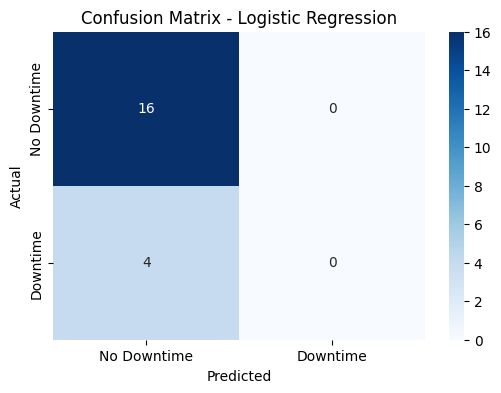

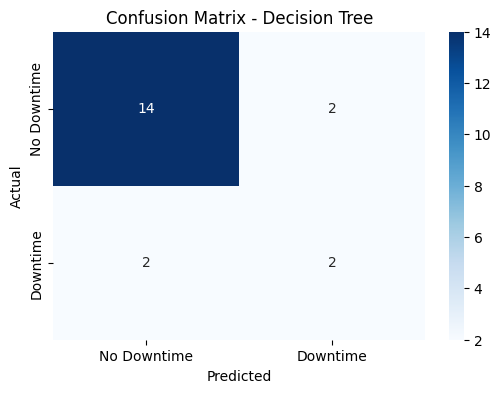

In [ ]:
print("\nConfusion Matrices:")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

In [ ]:
feature_importances = dt_clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

In [ ]:
print("\nFeature Importances (Decision Tree):")
print(importance_df)


Feature Importances (Decision Tree):
       Feature  Importance
1     Run_Time    0.596606
0  Temperature    0.403394


<ipython-input-142-79ac5db700d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


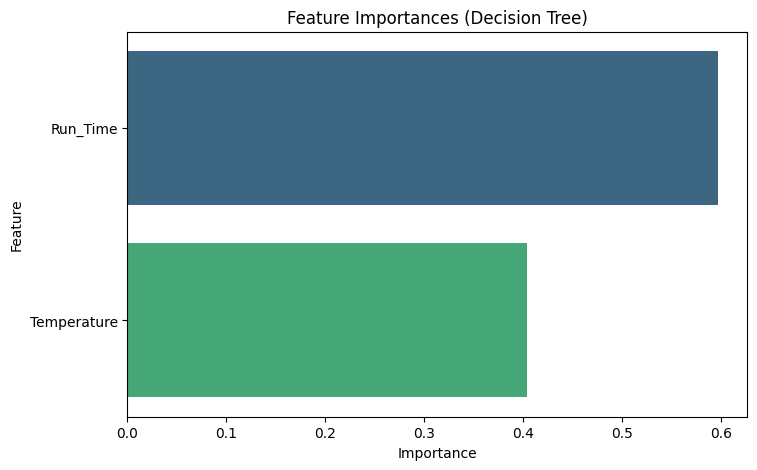

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances (Decision Tree)")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_lr = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:", cv_scores_lr)
print(f"Mean Accuracy (Logistic Regression): {cv_scores_lr.mean():.2f}")


Logistic Regression Cross-Validation Scores: [0.8  0.8  0.8  0.8  0.75]
Mean Accuracy (Logistic Regression): 0.79


In [ ]:
cv_scores_dt = cross_val_score(dt_clf, X_scaled, y, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores:", cv_scores_dt)
print(f"Mean Accuracy (Decision Tree): {cv_scores_dt.mean():.2f}")


Decision Tree Cross-Validation Scores: [0.65 0.8  0.7  0.75 0.75]
Mean Accuracy (Decision Tree): 0.73


In [ ]:
!pip install flask pyngrok scikit-learn


In [ ]:
!ngrok authtoken 2s1Zods8ezHuxMg6RaigNbvTMhv_5eWWr9iTBkZ5ZboHjik45


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from pyngrok import ngrok

app = Flask(__name__)

# Global variables
model = None
data = None

# Endpoint to upload the dataset
@app.route('/upload', methods=['POST'])
def upload():
    global data
    file = request.files['file']
    if file:
        data = pd.read_csv(file)
        return jsonify({"message": "File uploaded successfully!", "columns": list(data.columns)})
    return jsonify({"error": "File not uploaded"}), 400

# Endpoint to train the model
@app.route('/train', methods=['POST'])
def train():
    global model, data
    if data is None:
        return jsonify({"error": "No data uploaded"}), 400

    # Data preprocessing
    X = data[['Temperature', 'Run_Time']]
    y = data['Downtime_Flag']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save the model to a file
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return jsonify({"message": "Model trained successfully!", "accuracy": accuracy, "f1_score": f1})

# Endpoint to make predictions
@app.route('/predict', methods=['POST'])
@app.route('/predict', methods=['POST'])
def predict():
    global model
    if model is None:
        return jsonify({"error": "Model not trained"}), 400

    # Get input features from request
    input_data = request.json
    temperature = input_data.get('Temperature')
    run_time = input_data.get('Run_Time')

    if temperature is None or run_time is None:
        return jsonify({"error": "Missing input features"}), 400

    # Make prediction
    prediction = model.predict([[temperature, run_time]])[0]
    confidence = max(model.predict_proba([[temperature, run_time]])[0])

    # Convert prediction to "Yes" or "No" for downtime
    downtime = "Yes" if prediction == 1 else "No"

    return jsonify({"Downtime": downtime, "Confidence": round(confidence, 2)})


# Run Flask app
if __name__ == '__main__':
    # Expose Flask app to the public using ngrok
    public_url = ngrok.connect(5000).public_url
    print("Public URL:", public_url)
    app.run(port=5000)


Public URL: https://ed20-35-247-5-237.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 10:36:01] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 10:36:21] "POST /train HTTP/1.1" 200 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 10:36:46] "POST /predict HTTP/1.1" 200 -
